In [1]:
import numpy as np
import pandas as pd

In [2]:
df= pd.read_csv("mail_data.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
# Renaming the cells
df.rename(columns={'Message':'Text'}, inplace=True)

In [7]:
df.sample()

,Category,Text
4251,ham,How much for an eighth?


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [9]:
df['Category']=encoder.fit_transform(df['Category'])

In [10]:
df.head()

,Category,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#Checking missing values
df.isnull().sum()

Category    0
Text        0
dtype: int64

In [12]:
#Checking duplicate values
df.duplicated().sum()

415

In [13]:
#Removing duplicate values
df= df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape


(5157, 2)

# Exploratory Data Analysis

In [16]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

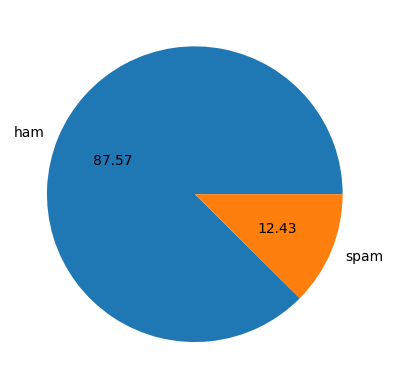

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [18]:
#Data is imbalanced

In [19]:
#using nltk(Natural Language ToolKit)
import nltk

In [20]:
df['num_characters']=df['Text'].apply(len)

In [21]:
df.head()

,Category,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df.describe()

,Category,num_characters
count,5157.000000,5157.000000
mean,0.124297,79.103936
std,0.329952,58.382922
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,118.000000
max,1.000000,910.000000


<Axes: xlabel='num_characters', ylabel='Count'>

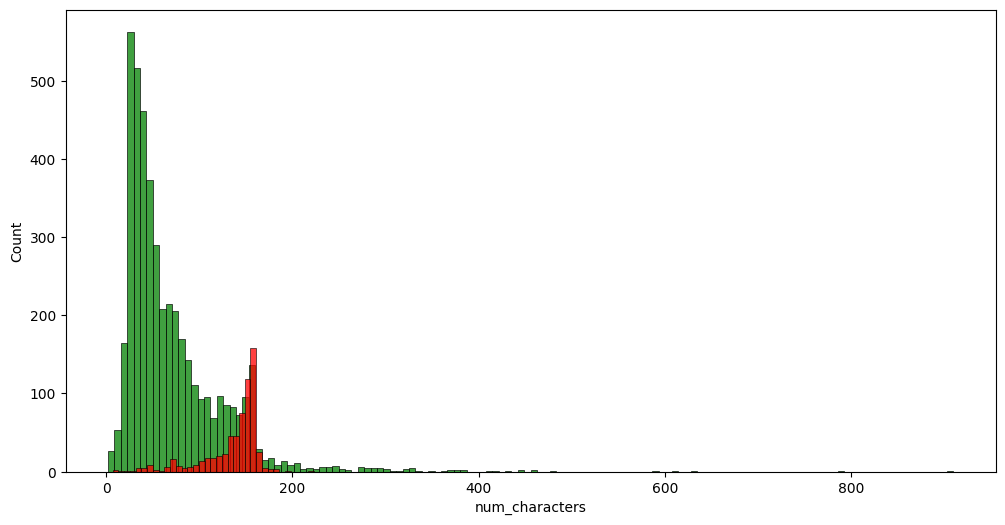

In [23]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'], color='green')
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')

# Data Preprocessing

In [24]:
import string
from nltk.stem import PorterStemmer

def transform_text(Text):
    # Convert text to lowercase
    Text = Text.lower()
    
    # Tokenize the text
    Text = Text.split()  # can use split() for basic tokenization
    
    # Remove non-alphanumeric characters and stopwords, and perform stemming
    ps = PorterStemmer()
    stopwords = set(["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
                     "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                     "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
                     "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
                     "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because",
                     "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into",
                     "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out",
                     "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where",
                     "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no",
                     "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just",
                     "don", "should", "now"])
    
    # Initialize an empty list to store cleaned and stemmed words
    cleaned_words = []
    
    for word in Text:
        # Remove punctuation and check if the word is not a stopword
        word = word.translate(str.maketrans('', '', string.punctuation))
        if word not in string.punctuation and word not in stopwords:
            # Perform stemming
            stemmed_word = ps.stem(word)
            cleaned_words.append(stemmed_word)
    
    # Join the cleaned and stemmed words back into a sentence
    cleaned_text = " ".join(cleaned_words)
    
    return cleaned_text


In [25]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'im gonna home soon dont want talk stuff anymor tonight k ive cri enough today'

In [26]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [27]:
df.head()

,Category,Text,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goe usf live around though


In [28]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))

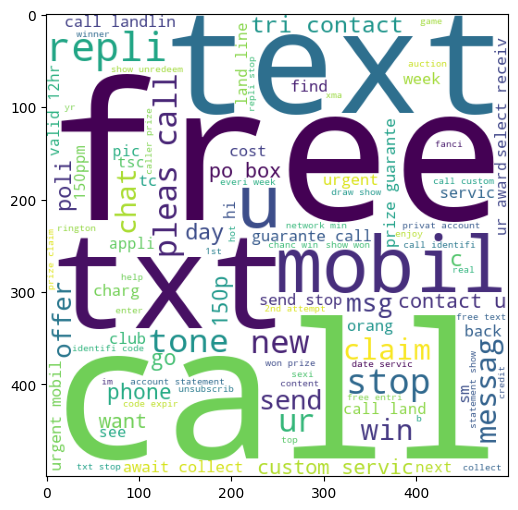

In [29]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

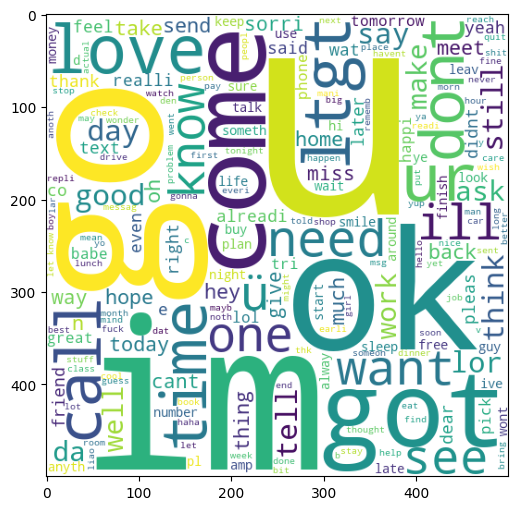

In [30]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [31]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

10686

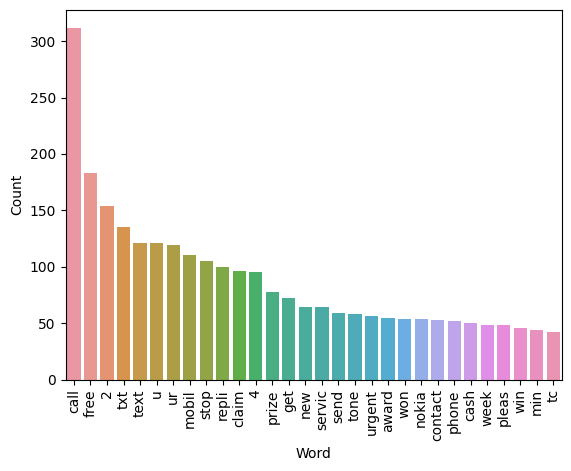

In [32]:
from collections import Counter
# Count the occurrences of each word in 'spam_corpus'
word_counts = Counter(spam_corpus)

# Create a DataFrame from the most common 30 words
top_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=top_words_df)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
len(ham_corpus)

37398

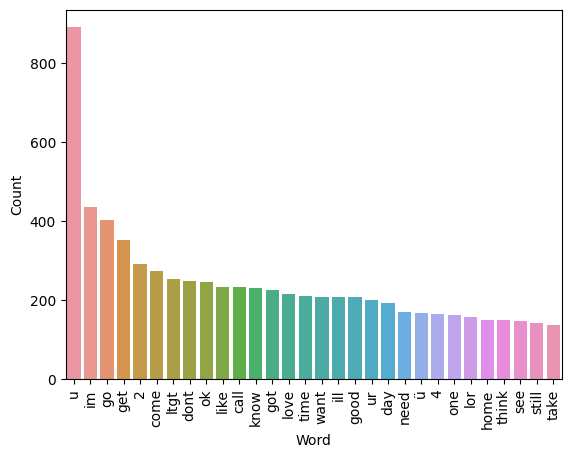

In [34]:
from collections import Counter
# Count the occurrences of each word in 'spam_corpus'
word_count = Counter(ham_corpus)

# Create a DataFrame from the most common 30 words
top_word_df = pd.DataFrame(word_count.most_common(30), columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=top_word_df)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [35]:
# Text Vectorization

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [37]:
# TRYING TO IMPROVE MODEL ACCURACY AND PRECISION

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)


# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [38]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [39]:
X.shape

(5157, 3000)

In [40]:
y = df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [42]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [43]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [44]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8798449612403101
[[798 107]
 [ 17 110]]
0.5069124423963134


In [45]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9757751937984496
[[905   0]
 [ 25 102]]
1.0


In [46]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9854651162790697
[[905   0]
 [ 15 112]]
1.0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [49]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'BNB': bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [50]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [51]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():
    
#     current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
#     print("For ",name)
#     print("Accuracy - ",current_accuracy)
#     print("Precision - ",current_precision)
    
#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)
    
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
# performance_df

In [52]:
# BernoulliNB is performing best. 
# Will use BernoulliNB for spam detection model

In [53]:
bnb.fit(X_train,y_train)
Y_pred = bnb.predict(X_test)
print(accuracy_score(y_test,Y_pred))
print(confusion_matrix(y_test,Y_pred))
print(precision_score(y_test,Y_pred))

0.9854651162790697
[[905   0]
 [ 15 112]]
1.0


In [54]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))

# Testing

In [55]:
new_text="You won the lottery. Claim your prize now !!"
preprocessed_new_text = transform_text(new_text)

# Vectorize the preprocessed new data using the same TF-IDF vectorizer
new_data_vectorized = tfidf.transform([preprocessed_new_text])

# Make predictions using the trained Bernoulli Naive Bayes classifier
predicted_label = bnb.predict(new_data_vectorized)

In [56]:
if predicted_label==0:
    print('Ham')
else:
    print('Spam')
predicted_label

Spam


array([1])